
#1 Most Awarded Gender and Birth Country
Most awarded gender: {top_gender}
Most awarded birth country: United States of America
____________________


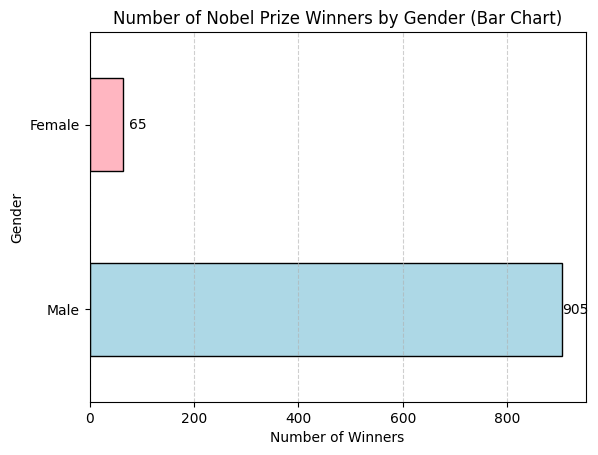


#2 Decade with the Highest Rate of US-born Winners
The decade with the highest rate of US-born winners is 2000.
____________________

#3 Decade and Category Pair with Highest Proportion of Female Winners
The decade and category pair with the highest proportion of female award winners is:
decade
1900    (1900, Literature)
1910     (1910, Chemistry)
1920    (1920, Literature)
1930         (1930, Peace)
1940         (1940, Peace)
1950     (1950, Chemistry)
1960    (1960, Literature)
1970         (1970, Peace)
1980      (1980, Medicine)
1990    (1990, Literature)
2000    (2000, Literature)
2010         (2010, Peace)
2020    (2020, Literature)
Name: female_proportion, dtype: object
____________________

#4 First Woman to Receive a Nobel Prize
The first woman to receive a Nobel Prize is: Marie Curie, nÃ©e Sklodowska
She received the award in the category: Physics
____________________

#5 Individuals or Organizations with More Than One Nobel Prize
Individuals or organizations that have won m

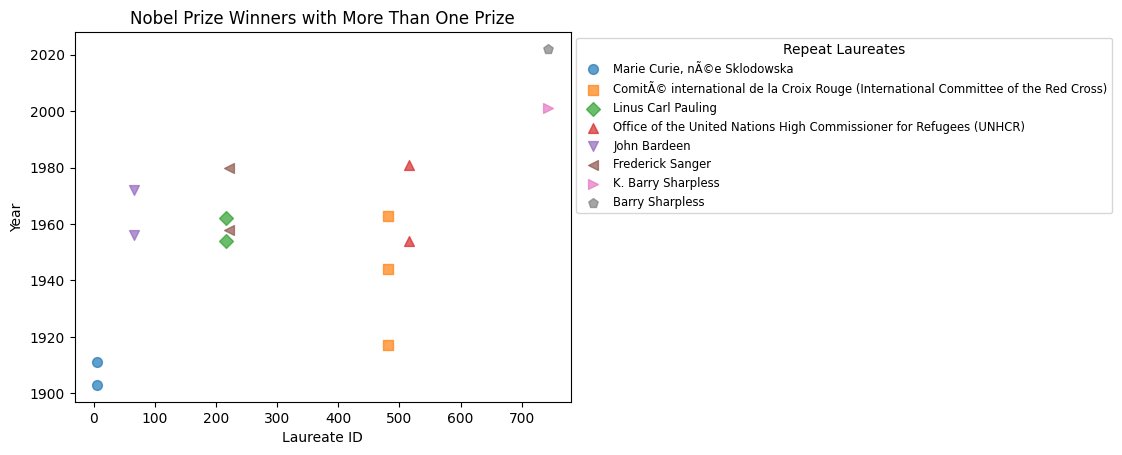

In [13]:
"""
Nobel Prize Winners Data Analysis
Author: ODHAIB
Date: 22/1/2024
"""

"""
**The Nobel Prize has been among the most prestigious international awards since
1901. Prizes are awarded annually in the fields of chemistry, literature, physics, physiology or medicine,
economics and peace. In addition to honour, prestige and a significant amount of prize money, the award
recipient also receives a gold medal bearing the image of Alfred Nobel (1833 - 1896), who founded the
award. The Nobel Foundation has made available a dataset of all laureates from the awards' inception, 1901
to 2023. The dataset used in this project was taken from the Nobel Prize API.
Analyze the data of Nobel Prize winners in detail, using the information you have learned until you come
to this data set (keep the analyzes in your codebook and you can talk about the important ones in the video
you will shoot). Prepare a Power Point presentation containing your analysis and the visuals you created
and answer the questions below. In addition to the questions, it is entirely up to your creativity to extract
meaningful information from the data and support it with various visuals.**

"""

import pandas as pd
import matplotlib.pyplot as plt

def most_awarded_gender_and_country(nobel_data):
    # Section 1: Most Awarded Gender and Birth Country
    print("\n#1 Most Awarded Gender and Birth Country")
    top_gender = nobel_data['sex'].value_counts().idxmax()
    top_country = nobel_data['birth_country'].value_counts().idxmax()

    print("\033[1mMost awarded gender: {top_gender}\033[0m")
    print(f"Most awarded birth country: {top_country}")
    print("____________________")

    # Visualize the number of Nobel Prize winners by gender
    gender_counts = nobel_data['sex'].value_counts()
    ax = gender_counts.plot(kind='barh', color=['lightblue', 'lightpink'], edgecolor='black')
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    for p in ax.patches:
        ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')

    plt.title('Number of Nobel Prize Winners by Gender (Bar Chart)')
    plt.xlabel('Number of Winners')
    plt.ylabel('Gender')
    plt.show()

def highest_rate_us_born_winners(nobel_data):
    # Section 2: Decade with the Highest Rate of US-born Winners
    print("\n#2 Decade with the Highest Rate of US-born Winners")
    nobel_data['year'] = pd.to_datetime(nobel_data['year'], format='%Y')
    nobel_data['decade'] = (nobel_data['year'].dt.year // 10) * 10

    decade_counts = nobel_data.groupby(['decade', 'birth_country']).size().unstack().fillna(0)
    decade_counts['us_rate'] = decade_counts['United States of America'] / decade_counts.sum(axis=1)

    max_decade_usa = decade_counts['us_rate'].idxmax()

    print(f"The decade with the highest rate of US-born winners is {max_decade_usa}.")
    print("____________________")

def highest_proportion_female_winners(nobel_data):
    # Section 3: Decade and Category Pair with Highest Proportion of Female Winners
    print("\n#3 Decade and Category Pair with Highest Proportion of Female Winners")
    nobel_data['year'] = pd.to_datetime(nobel_data['year'], format='%Y')
    nobel_data['decade'] = (nobel_data['year'].dt.year // 10) * 10

    decade_category_counts = nobel_data.groupby(['decade', 'category', 'sex']).size().unstack(fill_value=0)
    decade_category_counts['female_proportion'] = (decade_category_counts['Female'] / decade_category_counts.sum(axis=1)).fillna(0)

    max_female_decade_category = decade_category_counts.groupby('decade')['female_proportion'].idxmax()

    print("The decade and category pair with the highest proportion of female award winners is:")
    print(max_female_decade_category)
    print("____________________")

def first_woman_to_receive_nobel_prize(nobel_data):
    # Section 4: First Woman to Receive a Nobel Prize
    print("\n#4 First Woman to Receive a Nobel Prize")
    first_woman = nobel_data[nobel_data['sex'] == 'Female'].sort_values('year').iloc[0]
    first_woman_name = first_woman['full_name']
    first_woman_category = first_woman['category']

    print(f"The first woman to receive a Nobel Prize is: {first_woman_name}")
    print(f"She received the award in the category: {first_woman_category}")
    print("____________________")

def individuals_or_organizations_with_multiple_prizes(nobel_data):
    # Section 5: Individuals or Organizations with More Than One Nobel Prize
    print("\n#5 Individuals or Organizations with More Than One Nobel Prize")
    prizes_per_laureate = nobel_data.groupby('laureate_id').size()
    repeat_laureates = prizes_per_laureate[prizes_per_laureate > 1].index
    repeat_list = nobel_data[nobel_data['laureate_id'].isin(repeat_laureates)]['full_name'].unique().tolist()

    print("Individuals or organizations that have won more than one Nobel Prize:")
    for name in repeat_list:
        print(f"* {name}")

    # Visualization Considerations
    if len(repeat_list) > 0:
        # Scatter plot for individuals or organizations with more than one Nobel Prize
        repeat_laureates_data = nobel_data[nobel_data['laureate_id'].isin(repeat_laureates)]

        unique_colors = plt.cm.tab10(range(len(repeat_list)))
        unique_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p']

        for i, name in enumerate(repeat_list):
            laureate_data = repeat_laureates_data[repeat_laureates_data['full_name'] == name]
            plt.scatter(laureate_data['laureate_id'], laureate_data['year'], s=50, alpha=0.7, label=name,
                        color=unique_colors[i], marker=unique_markers[i])

        plt.title('Nobel Prize Winners with More Than One Prize')
        plt.xlabel('Laureate ID')
        plt.ylabel('Year')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Repeat Laureates', fontsize='small')
        plt.show()

# Read in the Nobel Prize data
data_file_path = '/content/nobe.csv'
nobel_data = pd.read_csv(data_file_path, encoding='unicode_escape')

# Execute analysis functions
most_awarded_gender_and_country(nobel_data)
highest_rate_us_born_winners(nobel_data)
highest_proportion_female_winners(nobel_data)
first_woman_to_receive_nobel_prize(nobel_data)
individuals_or_organizations_with_multiple_prizes(nobel_data)


